In [ ]:
import os
import random
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import shutil

# Load Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Install pv for progress visualization
!apt-get -qq install pv

# Create target directory (if it doesn't exist)
!mkdir -p /content/tid2013

DATASET_PATH = "/content/tid2013"
REF_PATH = os.path.join(DATASET_PATH, "reference_images")
DIST_PATH = os.path.join(DATASET_PATH, "distorted_images")
MOS_FILE = os.path.join(DATASET_PATH, "mos_with_names.txt")
PATCHES_PATH = "/content/drive/MyDrive/Samsung_Project/tid2013_patches"

NUM_SAMPLES = 1000

!du -sh /content/tid2013

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1.7G	/content/tid2013


# Sanity check on dataset and patches

In [ ]:
# Sanity check on dataset and patches

# Check if the dataset directory exists and contains files
if os.path.exists(DATASET_PATH) and os.listdir(DATASET_PATH):
    print(f"Dataset directory '{DATASET_PATH}' exists and contains files.")
else:
    print(f"Error: Dataset directory '{DATASET_PATH}' not found or empty.")

# Check if reference and distorted image directories exist and contain files
if os.path.exists(REF_PATH) and os.listdir(REF_PATH):
    print(f"Reference images directory '{REF_PATH}' exists and contains files.")
else:
    print(f"Error: Reference images directory '{REF_PATH}' not found or empty.")

if os.path.exists(DIST_PATH) and os.listdir(DIST_PATH):
    print(f"Distorted images directory '{DIST_PATH}' exists and contains files.")
else:
    print(f"Error: Distorted images directory '{DIST_PATH}' not found or empty.")

# Check if MOS file exists
if os.path.exists(MOS_FILE):
    print(f"MOS file '{MOS_FILE}' found.")
else:
    print(f"Error: MOS file '{MOS_FILE}' not found.")

# Check if patches directory exists (it will be created later, so this is just a check)
if os.path.exists(PATCHES_PATH):
    print(f"Patches directory '{PATCHES_PATH}' exists.")
else:
    print(f"Patches directory '{PATCHES_PATH}' does not exist")

# Optional: Display a few image file names to confirm data is there
if os.path.exists(REF_PATH) and os.listdir(REF_PATH):
    print("\nSample reference image files:")
    print(random.sample(os.listdir(REF_PATH), min(5, len(os.listdir(REF_PATH)))))

if os.path.exists(DIST_PATH) and os.listdir(DIST_PATH):
    print("\nSample distorted image files:")
    print(random.sample(os.listdir(DIST_PATH), min(5, len(os.listdir(DIST_PATH)))))

# Display a few image file names from tid2013_patches/copy
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")
if os.path.exists(COPY_PATCHES_PATH) and os.listdir(COPY_PATCHES_PATH):
    print(f"\nSample patch files from {COPY_PATCHES_PATH}:")
    print(random.sample(os.listdir(COPY_PATCHES_PATH), min(5, len(os.listdir(COPY_PATCHES_PATH)))))
elif os.path.exists(COPY_PATCHES_PATH):
     print(f"\nDirectory '{COPY_PATCHES_PATH}' is empty.")
else:
    print(f"\nDirectory '{COPY_PATCHES_PATH}' does not exist.")

# Optional: Read a few lines of the MOS file
if os.path.exists(MOS_FILE):
    print("\nSample lines from MOS file:")
    with open(MOS_FILE, 'r') as f:
        for i, line in enumerate(f):
            print(line.strip())
            if i >= 4: # Print first 5 lines
                break

Dataset directory '/content/tid2013' exists and contains files.
Reference images directory '/content/tid2013/reference_images' exists and contains files.
Distorted images directory '/content/tid2013/distorted_images' exists and contains files.
MOS file '/content/tid2013/mos_with_names.txt' found.
Patches directory '/content/drive/MyDrive/Samsung_Project/tid2013_patches' exists.

Sample reference image files:
['I15.BMP', 'I11.BMP', 'I20.BMP', 'I10.BMP', 'I12.BMP']

Sample distorted image files:
['i18_06_2.bmp', 'i23_20_4.bmp', 'i12_10_4.bmp', 'i02_17_4.bmp', 'i11_24_2.bmp']

Sample patch files from /content/drive/MyDrive/Samsung_Project/tid2013_patches/copy:
['copy_patch_0243.png', 'copy_patch_0846.png', 'copy_patch_0115.png', 'copy_patch_1097.png', 'copy_patch_1449.png']

Sample lines from MOS file:
5.51429 I01_01_1.bmp
5.56757 i01_01_2.bmp
4.94444 i01_01_3.bmp
4.37838 i01_01_4.bmp
3.86486 i01_01_5.bmp


Amount of files in /content/tid2013: 8
Amount of files in /content/tid2013/reference_images: 25
Amount of files in /content/tid2013/distorted_images: 3000
Amount of files in /content/drive/MyDrive/Samsung_Project/tid2013_patches/copy: 2000
Amount of lines in /content/tid2013/mos.txt: 3000


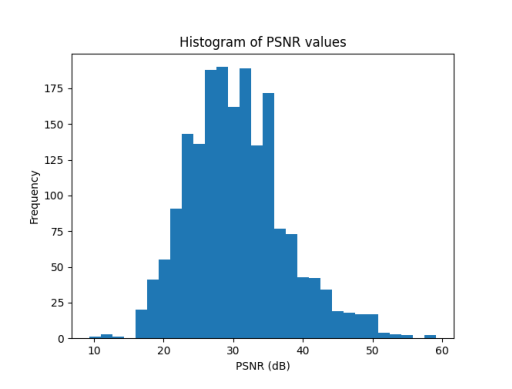

In [ ]:
# Print amount of files in tid2013
print(f"Amount of files in {DATASET_PATH}: {len(os.listdir(DATASET_PATH))}")

# Print amount of files in tid2013/reference_images
if os.path.exists(REF_PATH):
    print(f"Amount of files in {REF_PATH}: {len(os.listdir(REF_PATH))}")
else:
    print(f"Directory '{REF_PATH}' does not exist.")

# Print amount of files in tid2013/distorted_images
if os.path.exists(DIST_PATH):
    print(f"Amount of files in {DIST_PATH}: {len(os.listdir(DIST_PATH))}")
else:
    print(f"Directory '{DIST_PATH}' does not exist.")

# Print amount of files in tid2013_patches/copy
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")
if os.path.exists(COPY_PATCHES_PATH):
    print(f"Amount of files in {COPY_PATCHES_PATH}: {len(os.listdir(COPY_PATCHES_PATH))}")
else:
    print(f"Directory '{COPY_PATCHES_PATH}' does not exist.")

# Print amount of lines in mos.txt
MOS_TXT_FILE = os.path.join(DATASET_PATH, "mos.txt")
if os.path.exists(MOS_TXT_FILE):
    with open(MOS_TXT_FILE, 'r') as f:
        line_count = sum(1 for line in f)
    print(f"Amount of lines in {MOS_TXT_FILE}: {line_count}")
else:
    print(f"File '{MOS_TXT_FILE}' does not exist.")

# Display psnr.png if it exists
PSNR_PNG_FILE = os.path.join(PATCHES_PATH, "psnr_histogram.png")
if os.path.exists(PSNR_PNG_FILE):
    try:
        img = Image.open(PSNR_PNG_FILE)
        plt.imshow(img)
        plt.axis('off') # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error displaying image: {e}")

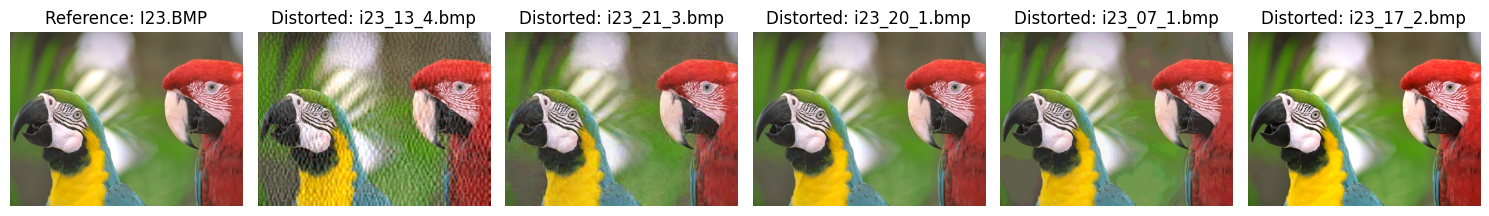

In [ ]:
# Perform some EDA: show samples of an image and its distorted images

# Choose a random reference image
reference_images = [f for f in os.listdir(REF_PATH) if f.endswith('.BMP')]
if not reference_images:
    print("No reference images found.")
else:
    random_ref_image_name = random.choice(reference_images)
    random_ref_image_path = os.path.join(REF_PATH, random_ref_image_name)

    try:
        ref_img = Image.open(random_ref_image_path)
        # Adjust figure size for better spacing
        plt.figure(figsize=(15, 7))
        plt.subplot(1, 6, 1) # Allocate space for reference + up to 5 distorted
        plt.imshow(ref_img)
        plt.title(f"Reference: {random_ref_image_name}")
        plt.axis('off')

        # Find corresponding distorted images
        # Distorted images are named like iXX_YY_Z.bmp where XX is the reference image number
        ref_number = random_ref_image_name.replace('I', '').replace('.BMP', '')
        corresponding_distorted_images = [f for f in os.listdir(DIST_PATH) if f.lower().startswith(f'i{int(ref_number):02d}_')]

        if not corresponding_distorted_images:
            print(f"No distorted images found for reference image {random_ref_image_name}")
            plt.show() # Show the reference image even if no distorted ones are found
        else:
            # Display up to 5 distorted images
            for i, dist_image_name in enumerate(random.sample(corresponding_distorted_images, min(5, len(corresponding_distorted_images)))):
                dist_image_path = os.path.join(DIST_PATH, dist_image_name)
                plt.subplot(1, min(5, len(corresponding_distorted_images)) + 1, i + 2)
                dist_img = Image.open(dist_image_path)
                plt.imshow(dist_img)
                plt.title(f"Distorted: {dist_image_name}")
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error displaying images: {e}")

Displaying sample patches from '/content/drive/MyDrive/Samsung_Project/tid2013_patches/copy':


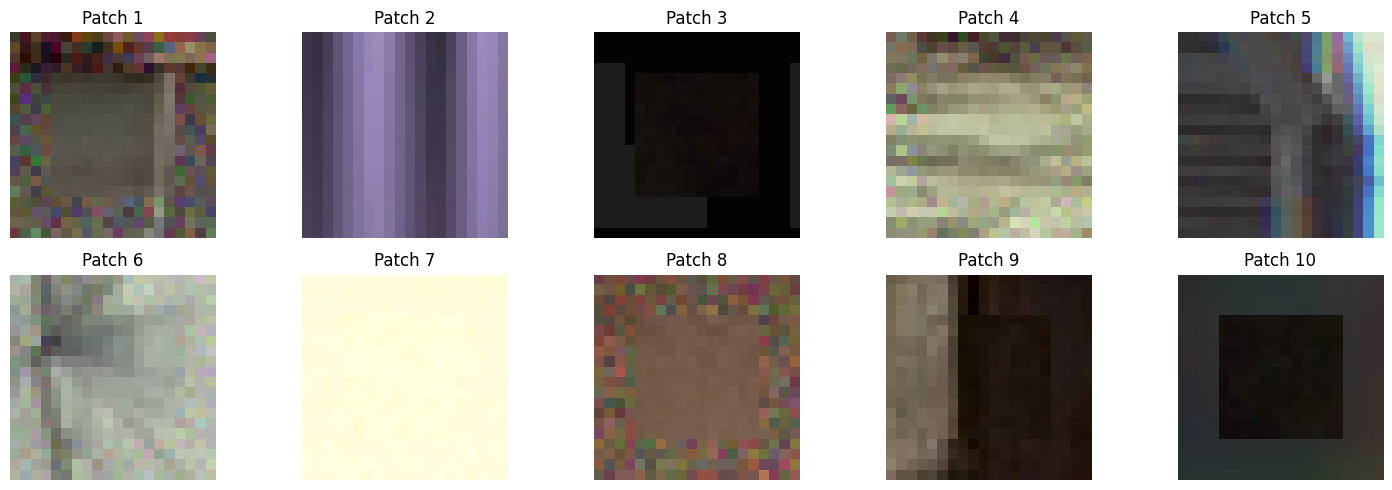

In [ ]:
# Perform EDA on patches: show samples from the single "copy" subfolder

# Define the path for the "copy" patch subfolder
COPY_PATCHES_PATH = os.path.join(PATCHES_PATH, "copy")

# Get a list of patch files in the "copy" directory
copy_patch_files = [f for f in os.listdir(COPY_PATCHES_PATH) if f.endswith('.png')] # Assuming patches are saved as .png

# Ensure there are patches to display
if not copy_patch_files:
    print(f"Error: Could not find patch files in '{COPY_PATCHES_PATH}'.")
else:
    print(f"Displaying sample patches from '{COPY_PATCHES_PATH}':")
    # Choose a few random patch file names
    sample_copy_patch_files = random.sample(copy_patch_files, min(10, len(copy_patch_files))) # Display up to 10 samples

    plt.figure(figsize=(15, 5))

    for i, patch_file_name in enumerate(sample_copy_patch_files):
        patch_path = os.path.join(COPY_PATCHES_PATH, patch_file_name)

        try:
            # Load and display the patch
            patch_img = Image.open(patch_path)
            plt.subplot(2, 5, i + 1) # Display in a 2x5 grid
            plt.imshow(patch_img)
            plt.title(f"Patch {i+1}")
            plt.axis('off')

        except Exception as e:
            print(f"Error displaying patch {patch_file_name}: {e}")

    plt.tight_layout()
    plt.show()


Total patch pairs checked for overlap within images: 80115
Number of overlapping patch pairs: 648
Percentage of overlapping patch pairs: 0.81%

Distribution of overlapping area percentages:
  0% overlap: 0 pairs
  1-10% overlap: 182 pairs
  10-50% overlap: 345 pairs
  50-100% overlap: 0 pairs


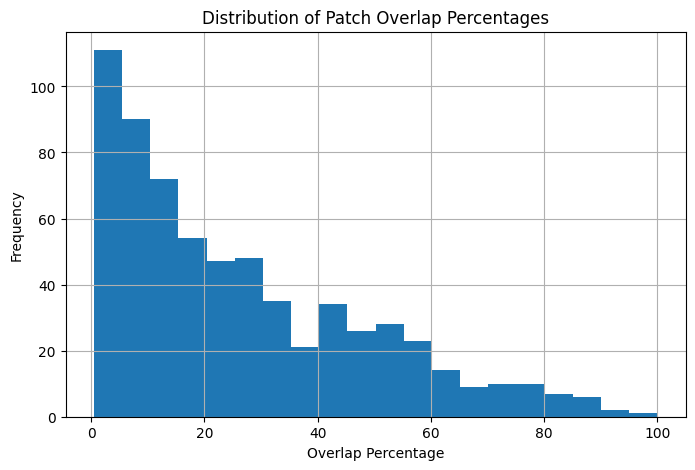

In [ ]:
import os
import json
from collections import defaultdict

# Function to calculate the intersection area of two patch regions
def intersection_area(region1, region2):
    # Assuming region is a list or tuple with [x, y, width, height]
    x1, y1, w1, h1 = region1
    x2, y2, w2, h2 = region2

    x_overlap = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_overlap = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))

    return x_overlap * y_overlap

# Function to check for overlap between two patch regions
def regions_overlap(region1, region2):
    return intersection_area(region1, region2) > 0

# --- Analyze Overlap using 'roi' metadata (grouped by clean_image) ---

metadata_file = os.path.join(PATCHES_PATH, "metadata.json")
if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            total_patch_pairs_checked = 0
            overlapping_patch_pairs_count = 0
            overlap_areas = []
            patch_area = None # To store the area of a single patch

            # Group patches by clean_image
            patches_by_image = defaultdict(list)
            for entry in metadata:
                if 'clean_image' in entry and 'metadata' in entry and 'roi' in entry['metadata']:
                     roi_data = entry['metadata']['roi']
                     if isinstance(roi_data, list) and len(roi_data) == 4:
                        patches_by_image[entry['clean_image']].append({
                            'id': entry.get('unique_sample_id', entry.get('clean_image', 'N/A')),
                            'region': roi_data
                        })
                        if patch_area is None: # Get patch area from the first valid entry
                            patch_area = roi_data[2] * roi_data[3]


            if patches_by_image:
                for clean_image, patch_list in patches_by_image.items():
                    if len(patch_list) > 1: # Only check for overlap if there's more than one patch from the same image
                        for i in range(len(patch_list)):
                            for j in range(i + 1, len(patch_list)):
                                total_patch_pairs_checked += 1
                                overlap_area = intersection_area(patch_list[i]['region'], patch_list[j]['region'])
                                if overlap_area > 0:
                                    overlapping_patch_pairs_count += 1
                                    overlap_areas.append(overlap_area)
                                    # Optional: Print details of overlapping pairs if needed for debugging
                                    # print(f"  Overlap detected between patch {patch_list[i]['id']} and patch {patch_list[j]['id']} (Area: {overlap_area})")


                # Calculate and print percentage of overlapping patches
                if total_patch_pairs_checked > 0:
                    percentage_overlapping = (overlapping_patch_pairs_count / total_patch_pairs_checked) * 100
                    print(f"\nTotal patch pairs checked for overlap within images: {total_patch_pairs_checked}")
                    print(f"Number of overlapping patch pairs: {overlapping_patch_pairs_count}")
                    print(f"Percentage of overlapping patch pairs: {percentage_overlapping:.2f}%")
                else:
                    print("\nNo patch pairs to check for overlap within images.")

                # Show distribution of overlapping areas
                if overlapping_patch_pairs_count > 0 and patch_area is not None:
                    print("\nDistribution of overlapping area percentages:")
                    overlap_percentages = [(area / patch_area) * 100 for area in overlap_areas]

                    # Define bins for distribution
                    bins = [0, 1, 10, 50, 100] # Example bins: 0%, 1-10%, 10-50%, 50-100% overlap
                    labels = ['0%', '1-10%', '10-50%', '50-100%']

                    # Categorize overlaps
                    categorized_overlaps = {}
                    for percentage in overlap_percentages:
                        categorized = False
                        for k in range(len(bins) - 1):
                            if bins[k] <= percentage < bins[k+1]:
                                label = f"{bins[k]}-{bins[k+1]}%" if bins[k+1] < 100 else f"{bins[k]}%+"
                                if label not in categorized_overlaps:
                                    categorized_overlaps[label] = 0
                                categorized_overlaps[label] += 1
                                categorized = True
                                break
                        if not categorized and percentage >= bins[-1]: # Handle 100% or more overlap
                             label = f"{bins[-1]}%+"
                             if label not in categorized_overlaps:
                                    categorized_overlaps[label] = 0
                             categorized_overlaps[label] += 1


                    # Print distribution
                    for label in labels:
                        if label in categorized_overlaps:
                            print(f"  {label} overlap: {categorized_overlaps[label]} pairs")
                        else:
                             print(f"  {label} overlap: 0 pairs")

                    # Optional: Plot histogram of overlap percentages
                    plt.figure(figsize=(8, 5))
                    plt.hist(overlap_percentages, bins=20) # Adjust bins as needed
                    plt.xlabel("Overlap Percentage")
                    plt.ylabel("Frequency")
                    plt.title("Distribution of Patch Overlap Percentages")
                    plt.grid(True)
                    plt.show()


                elif overlapping_patch_pairs_count > 0 and patch_area is None:
                     print("\nCould not calculate overlap percentage as patch area is unknown.")


            else:
                print("No valid patch information (clean_image, metadata.roi) found in metadata entries to analyze overlap.")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while analyzing overlap: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found. Cannot analyze overlap.")

# Distribution of Bins (RED, ORANGE, GREEN)

Found 2000 'color' values.


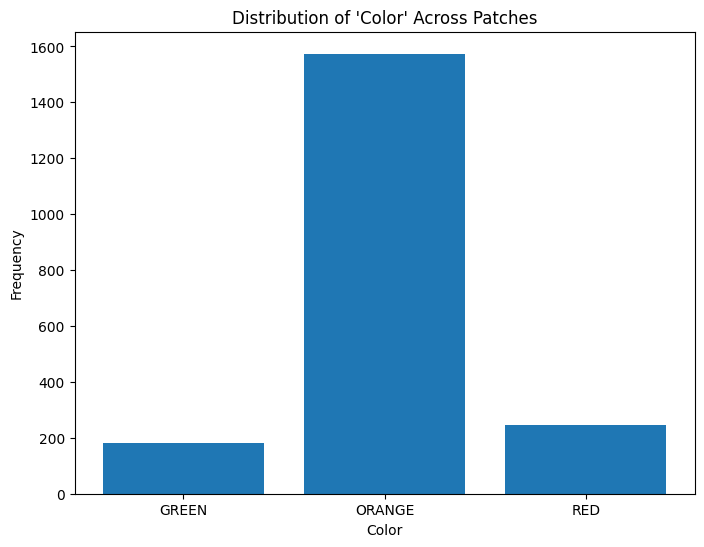


Color distribution counts:
  ORANGE: 1574
  RED: 245
  GREEN: 181


In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to the metadata file
metadata_file = os.path.join(PATCHES_PATH, "metadata.json")

color_values = []

if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            for entry in metadata:
                # Access 'color' nested within 'metadata'
                if 'metadata' in entry and 'color' in entry['metadata']:
                    color = entry['metadata']['color']
                    color_values.append(color)
                # Add other potential key locations/names if necessary


            if color_values:
                print(f"Found {len(color_values)} 'color' values.")
                # Count the occurrences of each color
                color_counts = Counter(color_values)

                # Sort colors alphabetically for consistent plotting
                sorted_colors = sorted(color_counts.keys())
                counts = [color_counts[color] for color in sorted_colors]

                # Create a bar chart (histogram for categorical data)
                plt.figure(figsize=(8, 6))
                plt.bar(sorted_colors, counts)
                plt.xlabel("Color")
                plt.ylabel("Frequency")
                plt.title("Distribution of 'Color' Across Patches")
                plt.show()

                print("\nColor distribution counts:")
                for color, count in color_counts.most_common():
                    print(f"  {color}: {count}")

            else:
                print("No 'color' values found in the metadata with the assumed key name ('metadata' -> 'color').")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while plotting the color distribution: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found.")

# Outliers


Found 2000 MOS scores for outlier analysis.

Identified 10 MOS outliers (using IQR method).
Lower bound for outliers: 0.78
Upper bound for outliers: 8.33


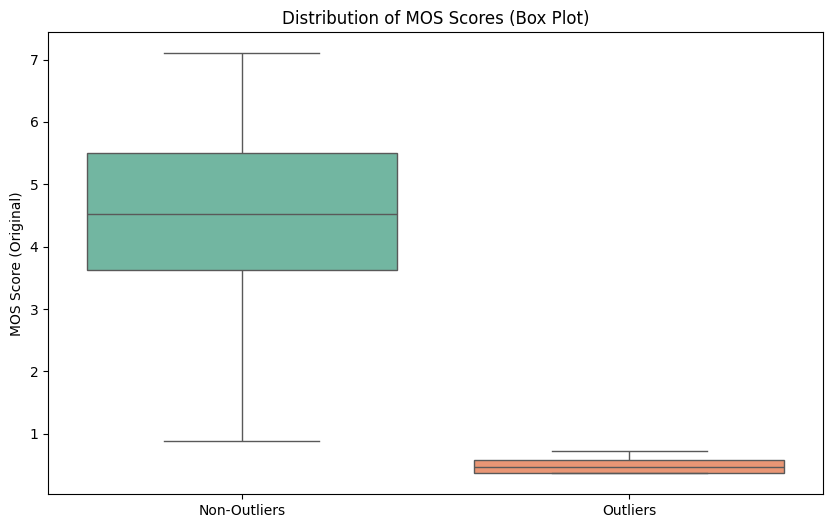


Processed 0 entries for correlation calculation. Skipped 2000 entries.
Skipped entries for correlation (first 10): ['copy_TID2013_case10_254_60', 'copy_TID2013_case24_28_7', 'copy_TID2013_case15_323_234', 'copy_TID2013_case10_339_155', 'copy_TID2013_case22_32_394', 'copy_TID2013_case11_349_485', 'copy_TID2013_case03_132_323', 'copy_TID2013_case18_67_304', 'copy_TID2013_case09_229_216', 'copy_TID2013_case02_255_57']...
Not enough data points (less than 2) to calculate correlation and plot.

Analysis complete (MOS outliers and PSNR-MOS correlation).


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

# Initialize variables before the try block
all_mos_scores = []
psnr_values = []
mos_scores_for_correlation = []
processed_count_correlation = 0
skipped_correlation_entries = []


# --- MOS Outlier Analysis and Box Plot ---
metadata_file = os.path.join(PATCHES_PATH, "metadata.json")
if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r') as f:
            metadata = json.load(f)

        if metadata:
            for entry in metadata:
                 if 'metadata' in entry and 'mos_original' in entry['metadata']:
                    all_mos_scores.append(entry['metadata']['mos_original'])

                    # Collect data for correlation analysis
                    if 'psnr_center' in entry['metadata'] and 'mos_original' in entry['metadata']:
                        psnr_values.append(entry['metadata']['psnr_center'])
                        mos_scores_for_correlation.append(entry['metadata']['mos_original'])
                        processed_count_correlation += 1
                    else:
                         skipped_correlation_entries.append(entry.get('unique_sample_id', 'N/A'))


            if all_mos_scores:
                print(f"\nFound {len(all_mos_scores)} MOS scores for outlier analysis.")

                # Convert to numpy array for easier calculations
                mos_scores_np = np.array(all_mos_scores)

                # Identify Outliers (using IQR method)
                Q1 = np.percentile(mos_scores_np, 25)
                Q3 = np.percentile(mos_scores_np, 75)
                IQR = Q3 - Q1

                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = mos_scores_np[(mos_scores_np < lower_bound) | (mos_scores_np > upper_bound)]
                non_outliers = mos_scores_np[(mos_scores_np >= lower_bound) & (mos_scores_np <= upper_bound)]

                print(f"\nIdentified {len(outliers)} MOS outliers (using IQR method).")
                print(f"Lower bound for outliers: {lower_bound:.2f}")
                print(f"Upper bound for outliers: {upper_bound:.2f}")


                # Create Box Plot
                plt.figure(figsize=(10, 6))
                plot_data = []
                labels = []

                if len(non_outliers) > 0:
                    plot_data.append(non_outliers)
                    labels.append("Non-Outliers")

                if len(outliers) > 0:
                    plot_data.append(outliers)
                    labels.append("Outliers")

                if plot_data:
                    sns.boxplot(data=plot_data, palette="Set2")
                    plt.xticks(ticks=range(len(labels)), labels=labels)
                    plt.ylabel("MOS Score (Original)")
                    plt.title("Distribution of MOS Scores (Box Plot)")
                    plt.show()
                else:
                    print("No MOS data to plot (either no scores found or all scores are outliers/non-outliers).")


            else:
                print("No MOS scores found in the metadata with the assumed key name ('metadata' -> 'mos_original') for outlier analysis.")


            # --- Pearson Correlation Calculation and Scatter Plot ---
            print(f"\nProcessed {processed_count_correlation} entries for correlation calculation. Skipped {len(skipped_correlation_entries)} entries.")
            if skipped_correlation_entries:
                print(f"Skipped entries for correlation (first 10): {skipped_correlation_entries[:10]}...")


            if psnr_values and mos_scores_for_correlation and len(psnr_values) == len(mos_scores_for_correlation) and len(psnr_values) > 1:
                print(f"Calculating Pearson correlation for {len(psnr_values)} pairs...")
                # Calculate Pearson correlation coefficient and p-value
                correlation_coefficient, p_value = pearsonr(psnr_values, mos_scores_for_correlation)

                print(f"\nPearson Correlation Coefficient (PSNR vs. MOS): {correlation_coefficient:.4f}")
                print(f"P-value: {p_value:.4f}")

                # Interpret the correlation
                if abs(correlation_coefficient) > 0.7:
                    print("Interpretation: Strong correlation.")
                elif abs(correlation_coefficient) > 0.3:
                    print("Interpretation: Moderate correlation.")
                else:
                    print("Interpretation: Weak or no significant correlation.")

                # Create the scatter plot
                plt.figure(figsize=(10, 6))
                plt.scatter(psnr_values, mos_scores_for_correlation, alpha=0.5)
                plt.xlabel("PSNR (dB) of 12x12 Center")
                plt.ylabel("MOS Score (Original)")
                plt.title(f"Scatter Plot of PSNR vs. MOS Score (Pearson r = {correlation_coefficient:.4f})")
                plt.grid(True)
                plt.show()
            elif len(psnr_values) <= 1:
                print("Not enough data points (less than 2) to calculate correlation and plot.")
            else:
                print("No valid PSNR and MOS score pairs found after processing metadata for correlation.")

        else:
            print("Metadata file is empty.")

    except json.JSONDecodeError:
        print(f"Error decoding JSON from {metadata_file}. Please check the file for syntax errors.")
    except Exception as e:
        print(f"An error occurred while processing data and plotting: {e}")

else:
    print(f"Metadata file '{metadata_file}' not found.")

print("\nAnalysis complete (MOS outliers and PSNR-MOS correlation).")